# Nursery - OrdinalEncoding
- https://archive.ics.uci.edu/dataset/76/nursery
- no null values
- all variables categorical
- class target:['not_recommended' 'priority' 'special_priority']
- mlp classifier

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
col_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']

class_names=['not_recommended', 'priority', 'special_priority']

df = pd.read_csv('../data/nursery/nursery.data', names=col_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [3]:
# Rename values
df['parents'] = df['parents'].replace('great_pret', 'great_pretension')
df['has_nurs'] = df['has_nurs'].replace('very_crit', 'very_critical')
df['housing'] = df['housing'].replace('less_conv', 'less_convenient')
df['finance'] = df['finance'].replace('inconv', 'inconvenient')
df['social'] = df['social'].replace('nonprob', 'non_problematic')
df['social'] = df['social'].replace('slightly_prob', 'slightly_problematic')
df['health'] = df['health'].replace('not_recom', 'not_recommended')
df['class'] = df['class'].replace('not_recom', 'not_recommended')
df['class'] = df['class'].replace('recommend', 'recommended')
df['class'] = df['class'].replace('very_recom', 'very_recommended')
df['class'] = df['class'].replace('spec_prior', 'special_priority')

print(df['class'].value_counts())
df = df[~df['class'].isin(['very_recommended', 'recommended'])]
df.shape

class
not_recommended     4320
priority            4266
special_priority    4044
very_recommended     328
recommended            2
Name: count, dtype: int64


(12630, 9)

In [4]:
# List unique value of each column
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

df['class'].value_counts()

parents : ['usual' 'pretentious' 'great_pretension']
has_nurs : ['proper' 'less_proper' 'improper' 'critical' 'very_critical']
form : ['complete' 'completed' 'incomplete' 'foster']
children : ['1' '2' '3' 'more']
housing : ['convenient' 'less_convenient' 'critical']
finance : ['convenient' 'inconvenient']
social : ['non_problematic' 'slightly_problematic' 'problematic']
health : ['priority' 'not_recommended' 'recommended']
class : ['priority' 'not_recommended' 'special_priority']


class
not_recommended     4320
priority            4266
special_priority    4044
Name: count, dtype: int64

### Data encoding

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Define the categories with order for each column according to attribute values in PDF
categories = [
    ['usual', 'pretentious', 'great_pretension'],                           # parents
    ['proper', 'less_proper', 'improper', 'critical', 'very_critical'],     # has_nurs
    ['complete', 'completed', 'incomplete', 'foster'],                      # form
    ['1', '2', '3', 'more'],                                                # children
    ['convenient', 'less_convenient', 'critical'],                          # housing
    ['convenient', 'inconvenient'],                                         # finance
    ['non_problematic', 'slightly_problematic', 'problematic'],             # social
    ['not_recommended', 'recommended', 'priority'],                         # health
]

# Initialise the OrdinalEncoder with defined categories
ord_enc = OrdinalEncoder(categories=categories)

# List of categorical columns (excluded class column)
cat_cols = col_names[:-1]

# Encode each categorical column
ord_enc_data = ord_enc.fit_transform(df[cat_cols])

# Convert to integer type
ord_enc_data = ord_enc_data.astype(int)

# Create a DataFrame with the encoded data
X = pd.DataFrame(ord_enc_data, columns=cat_cols)

# Encoding class column with numerical values
class_mapping = {'not_recommended': 0, 'priority': 1, 'special_priority': 2}

y = df['class'].map(class_mapping)

In [6]:
categories_dict = {i: list(cat) for i, cat in enumerate(ord_enc.categories_)}

In [7]:
df['class'].value_counts()

class
not_recommended     4320
priority            4266
special_priority    4044
Name: count, dtype: int64

### Model

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create MLP classifier model
model = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=10000, random_state=1)

# Train MLP classifier model
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=10000, random_state=1)

### Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on training data
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Evaluation on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluation on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Output results
print("Training Data Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print("Classification Report:\n", train_classification_report)
print("Confusion Matrix:\n", train_confusion_matrix)

print("\nTest Data Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training Data Evaluation:
Accuracy: 0.9819
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3441
           1       0.98      0.97      0.97      3423
           2       0.97      0.97      0.97      3240

    accuracy                           0.98     10104
   macro avg       0.98      0.98      0.98     10104
weighted avg       0.98      0.98      0.98     10104

Confusion Matrix:
 [[3441    0    0]
 [   0 3324   99]
 [   0   84 3156]]

Test Data Evaluation:
Accuracy: 0.9802
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       879
           1       0.97      0.97      0.97       843
           2       0.97      0.97      0.97       804

    accuracy                           0.98      2526
   macro avg       0.98      0.98      0.98      2526
weighted avg       0.98      0.98      0.98      2526

Confusion Matrix:
 [[879   0   0]

In [10]:
X_test.shape

(2526, 8)

In [11]:
X_train.shape

(10104, 8)

## Permutation Feature Importance

In [12]:
from eli5 import show_weights, show_prediction, explain_weights_df
from eli5.sklearn import PermutationImportance

In [13]:
# Permutation feature importance - TRAIN DATA
perm_train = PermutationImportance(model, random_state=1).fit(X_train, y_train)
show_weights(perm_train, feature_names=list(X_train.columns))

In [14]:
# Permutation feature importance - TEST DATA
perm_test = PermutationImportance(model, random_state=1).fit(X_test, y_test)
show_weights(perm_test, feature_names=list(X_test.columns))

## PDP

In [15]:
from pdpbox import pdp, get_example, info_plots

In [16]:
# Copy OrdinalEncoded dataset to add class column
X_new = X_test.copy()
X_new['class'] = y

pdp_target_cols = ['target_0', 'target_1', 'target_2']

In [17]:
pdp_health = pdp.PDPIsolate(
    model=model,
    df=X_new,
    model_features=X_test.columns,
    feature="health",
    feature_name="health",
    n_classes=3
)

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

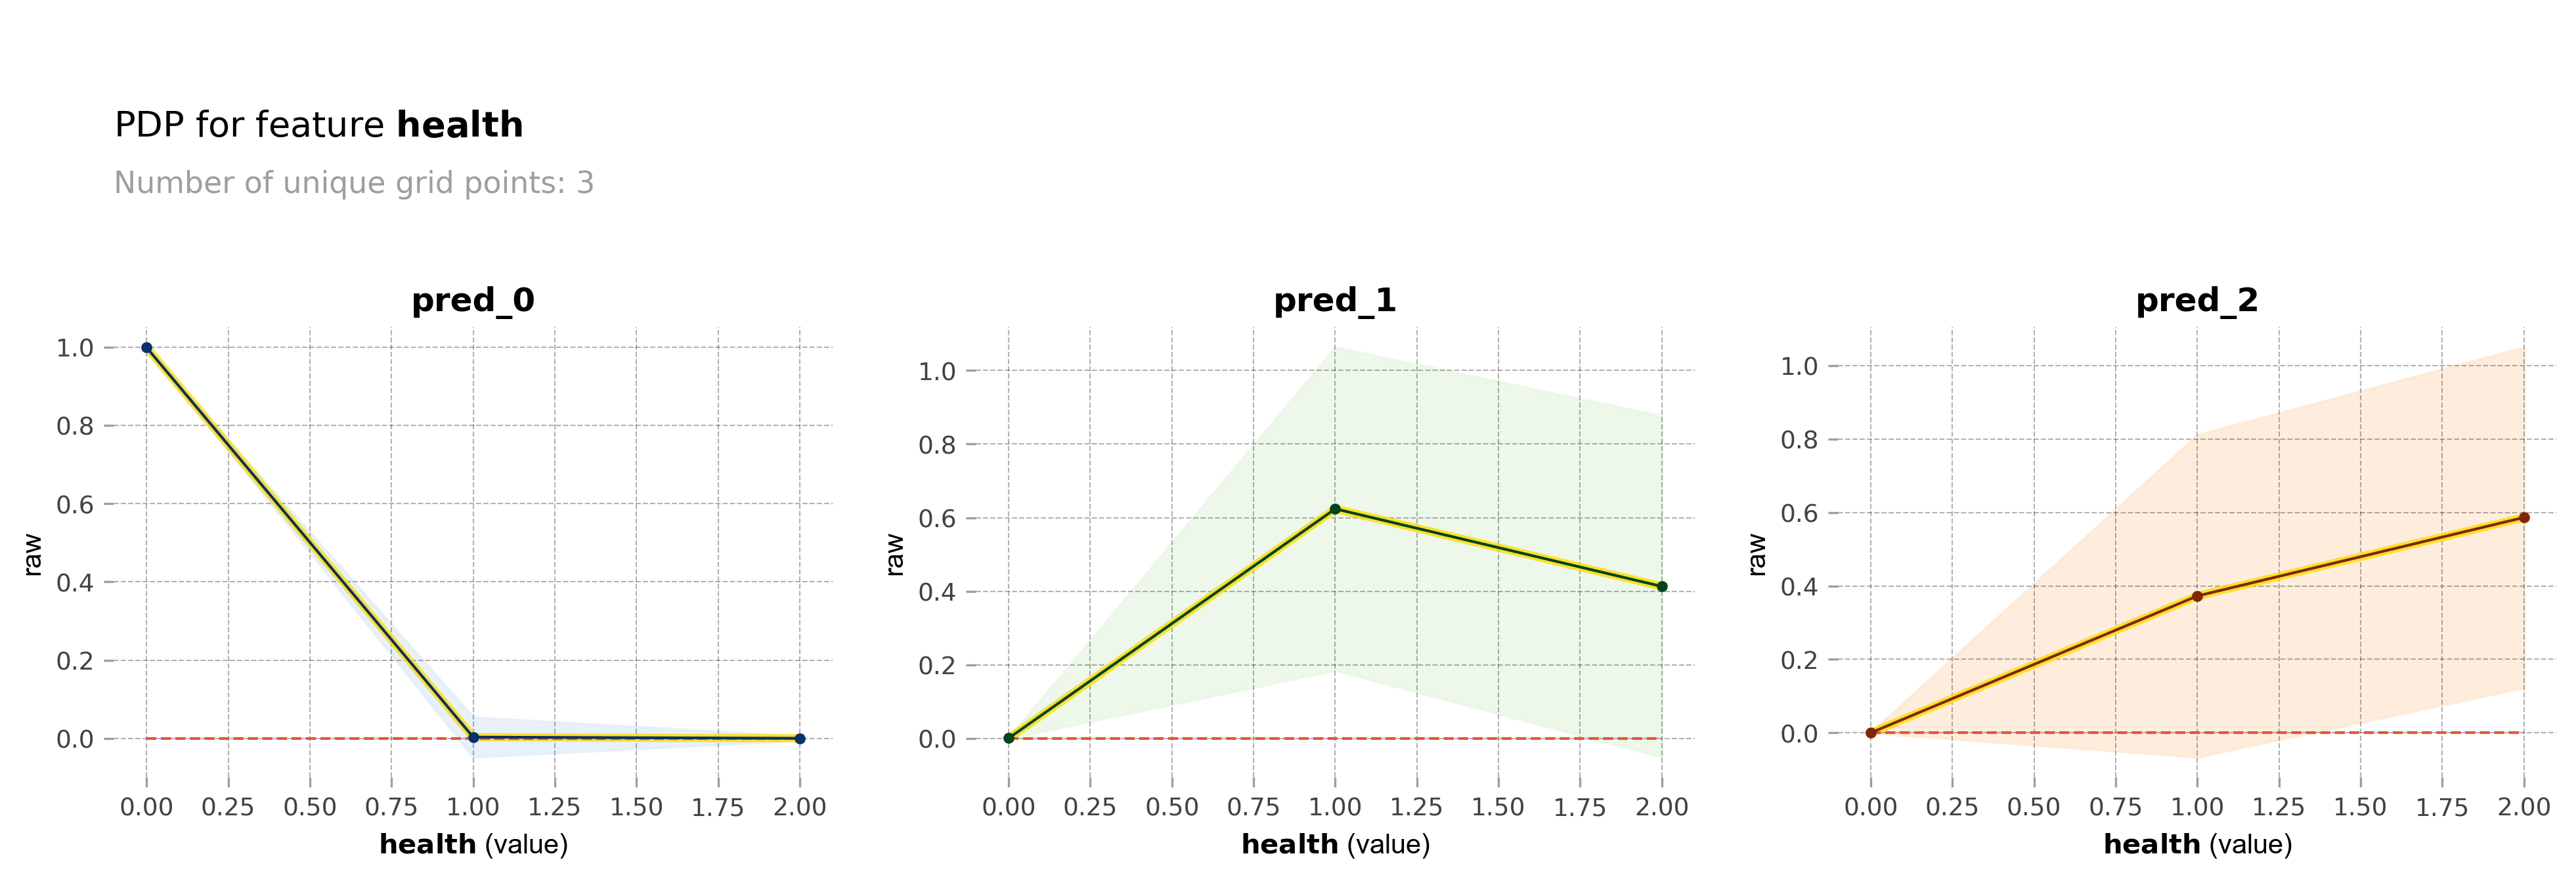

In [18]:
fig, axes = pdp_health.plot(
    center=False,
    plot_lines=False,
    plot_pts_dist=False,
    to_bins=False,
    ncols=3,
    figsize=(16, 5),
    plot_params={"pdp_hl": True, "gaps": {"outer_x": 0.2, "inner_y": 0.7, "outer_y": 0.1}},
    engine='matplotlib',
    template='plotly_white',
)

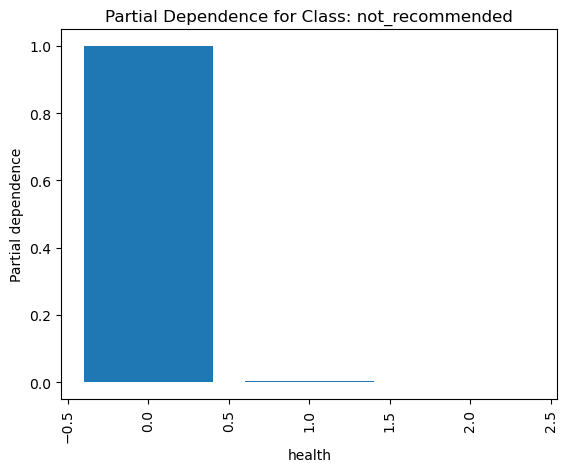

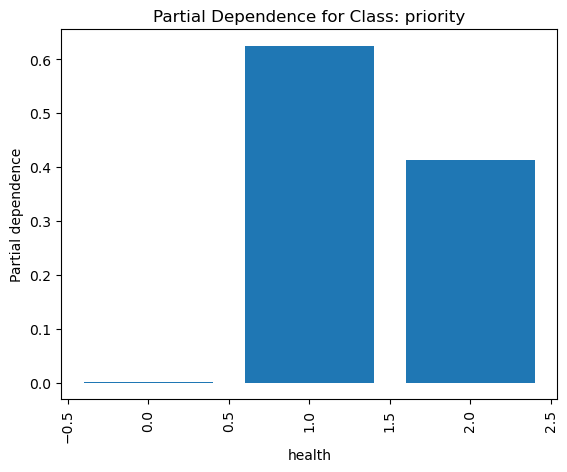

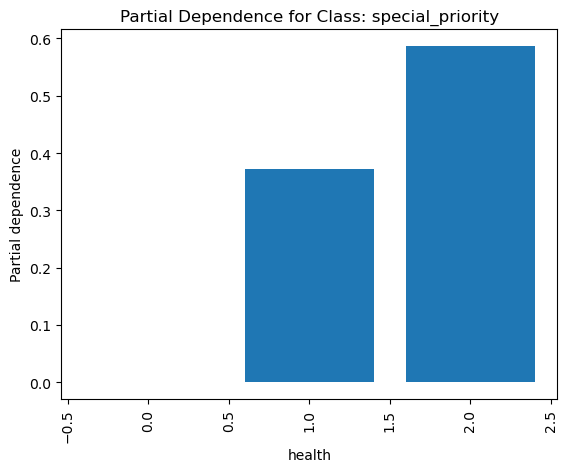

In [19]:
from sklearn.inspection import PartialDependenceDisplay

var_name = "health"

class_mapping = {'not_recommended': 0, 'priority': 1, 'special_priority': 2}

for i in model.classes_:
    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_test,
        features=["health"],
        categorical_features=X_test.columns,
        target=i,
        random_state=1,
    )
    # Set title for the graph
    plt.title(f"Partial Dependence for Class: {list(class_mapping.keys())[i]}")
    plt.show()

## ICE

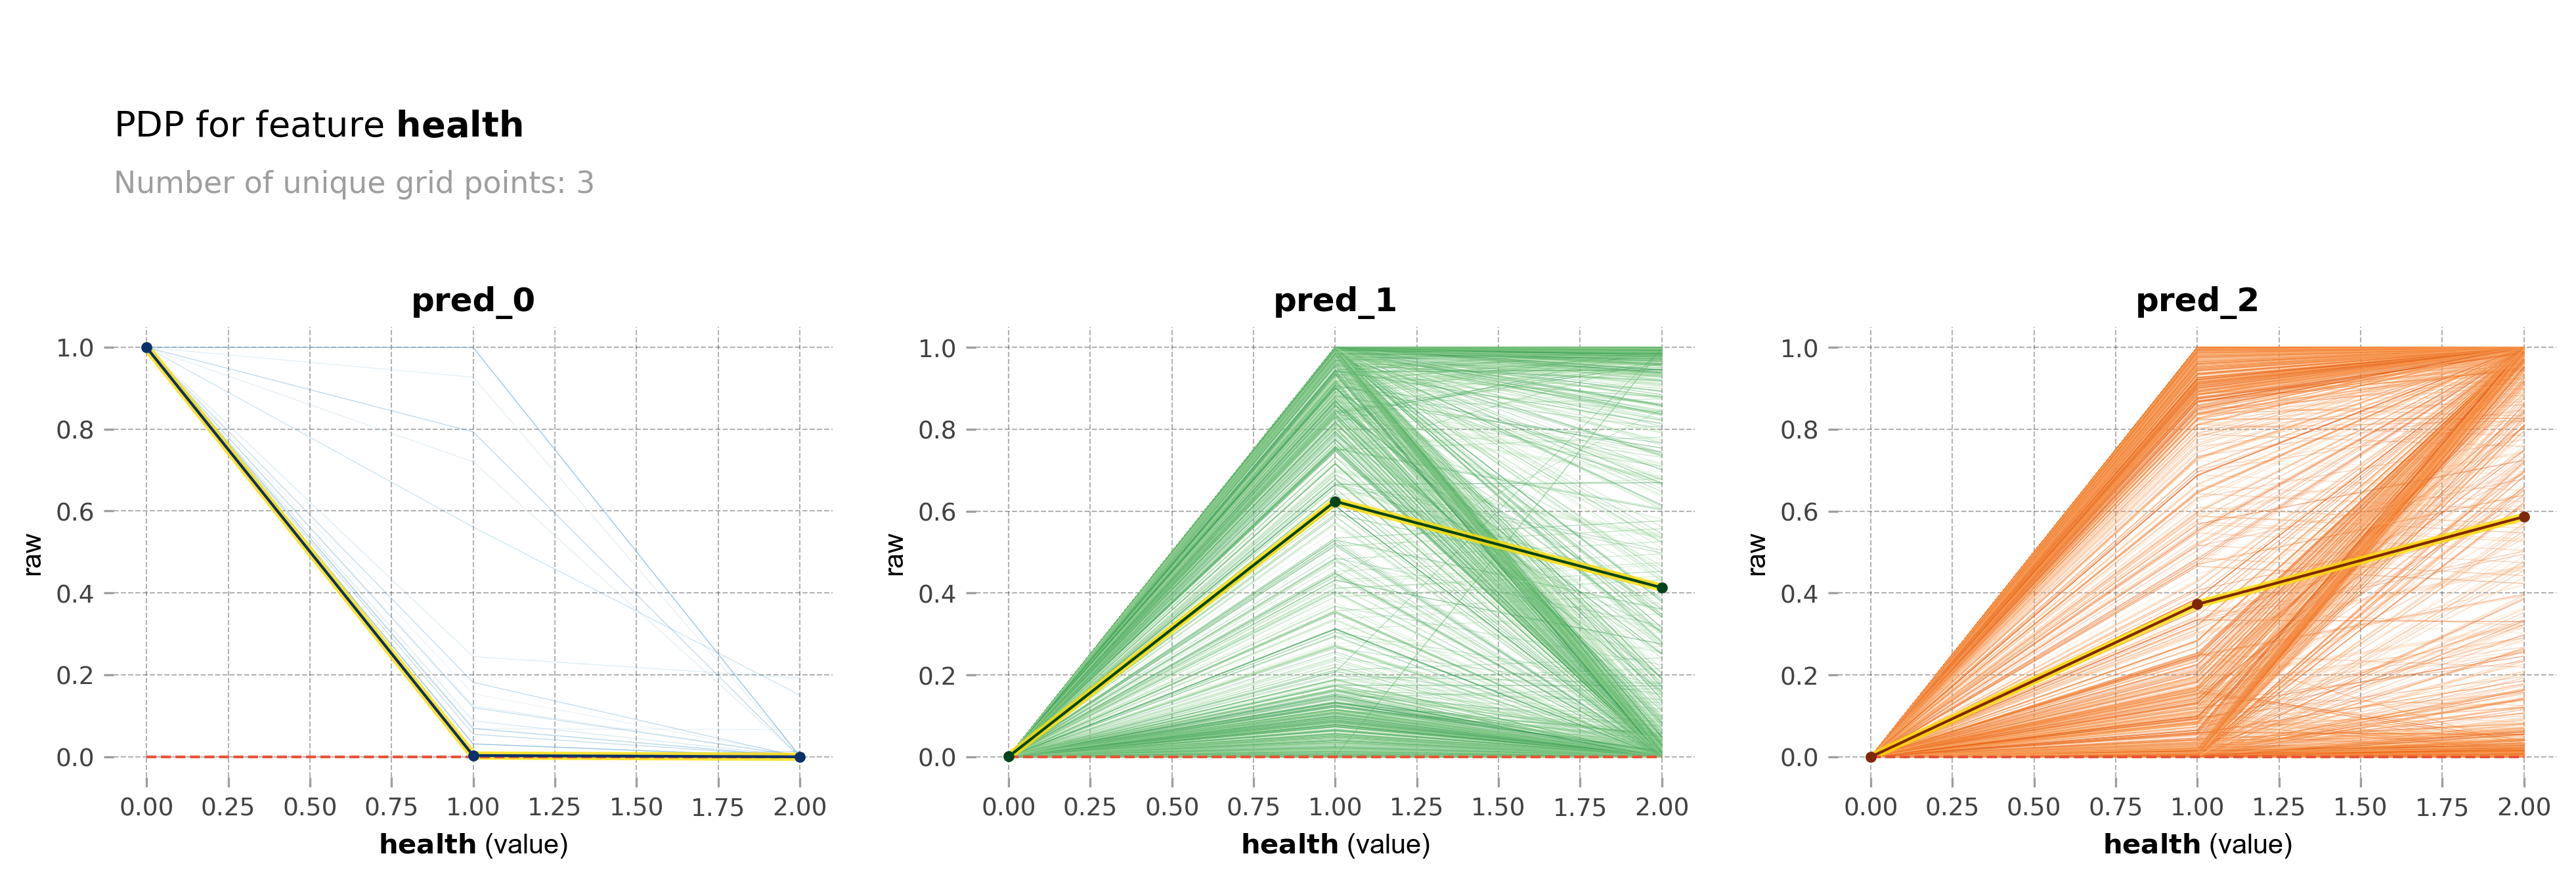

In [20]:
fig, axes = pdp_health.plot(
    center=False,
    plot_lines=True,
    plot_pts_dist=False,
    to_bins=False,
    ncols=3,
    figsize=(16, 5),
    plot_params={"pdp_hl": True, "gaps": {"outer_x": 0.2, "inner_y": 0.7, "outer_y": 0.1}},
    engine='matplotlib',
    template='plotly_white',
)

In [21]:
predict_health = info_plots.PredictPlot(
    model=model,
    df=X_new,
    model_features=X_test.columns,
    grid_type='equal',
    feature="health",
    feature_name="health",
    n_classes=3
)

obtain pred_func from the provided model.


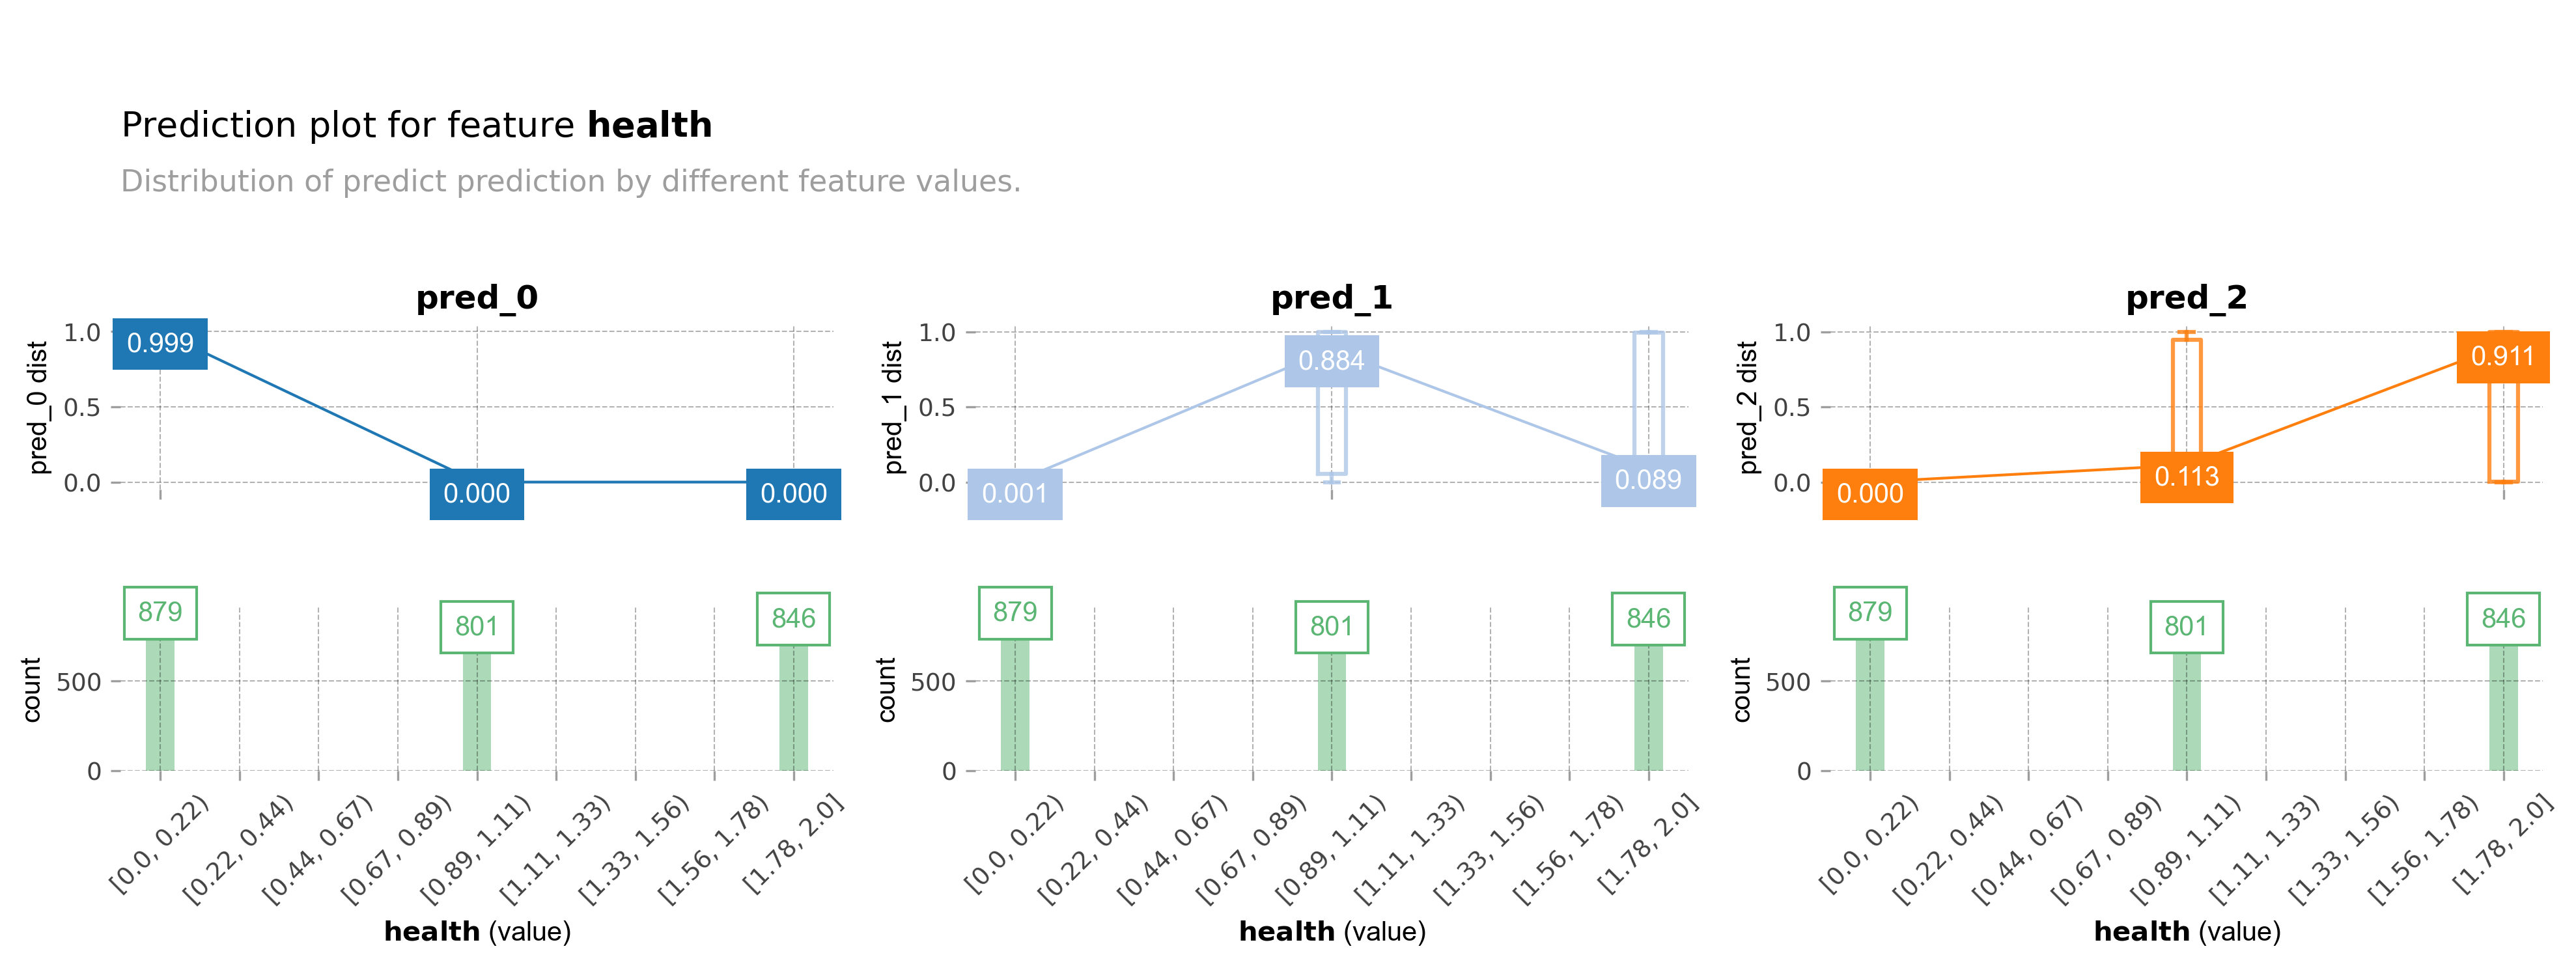

In [22]:
fig, axes, summary_df = predict_health.plot(
    ncols=3,
    figsize=(16, 5),
    plot_params={"pdp_hl": True, "gaps": {"outer_x": 0.2, "inner_y": 0.7, "outer_y": 0.1}},
    engine='matplotlib',
    template='plotly_white',
)

for ax in axes['bar_axes']:
    ax.tick_params(axis='x', labelrotation=45)

## ALE

In [23]:
from PyALE import ale

PyALE._ALE_generic:INFO: Discrete feature detected.


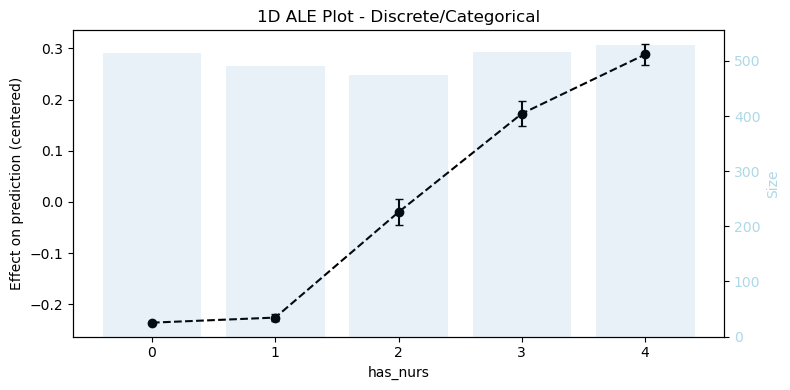

In [24]:
## 1D - discrete
ale_eff = ale(X=X_test,
    model=model,
    feature=["has_nurs"],
    predictors=['proper', 'less_proper', 'improper', 'critical', 'very_critical']
)

## LIME

In [25]:
import lime.lime_tabular

In [26]:
# Simple Lime tabular explainer with all classification class
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
                                      class_names=['not_recommended', 'priority', 'special_priority'],
                                      feature_names=X_test.columns,
                                      categorical_features=range(0,8),
                                      categorical_names=categories_dict,
                                      mode='classification',
                                      random_state=1)

explanation = lime_explainer.explain_instance(X_test.iloc[0].values, model.predict_proba, num_features=len(X_test.columns), top_labels=4)

explanation.show_in_notebook()

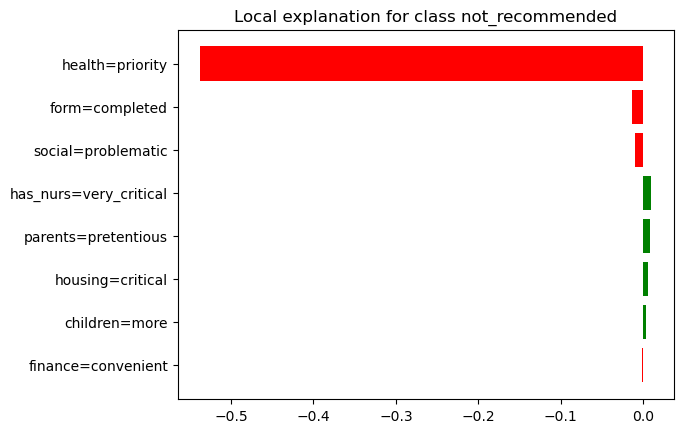

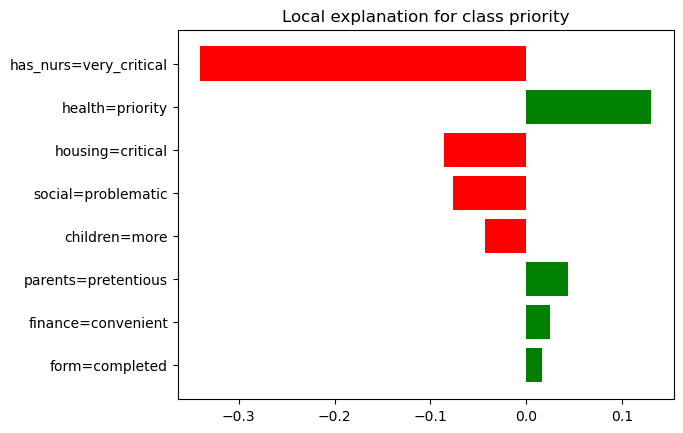

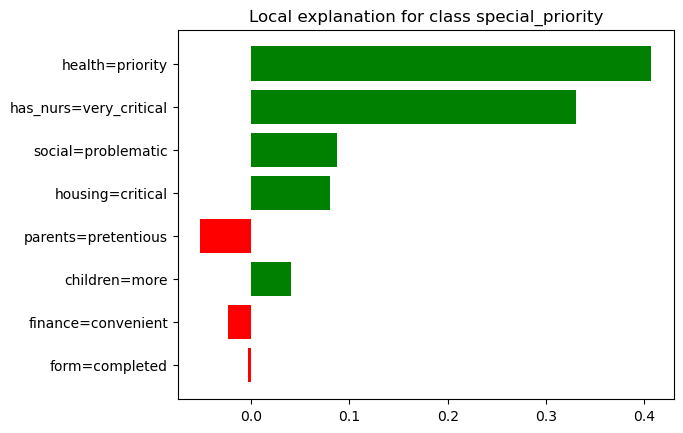

In [27]:
# Graphical explanation for every class
for i in range(0, 3):
    explanation.as_pyplot_figure(label=i)

In [28]:
# Simple Lime tabular explainer with all classification class
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
                                      class_names=['not_recommended', 'priority', 'special_priority'],
                                      feature_names=X_test.columns,
                                      categorical_features=range(0,8),
                                      categorical_names=categories_dict,
                                      mode='classification',
                                      random_state=1)

explanation = lime_explainer.explain_instance(X_test.iloc[1].values, model.predict_proba, num_features=len(X_test.columns), top_labels=1)

explanation.show_in_notebook()

## Anchors

In [29]:
from alibi.explainers import AnchorTabular

In [30]:
feature_names = col_names[:-1]

In [31]:
explainer = AnchorTabular(
    predictor=model.predict_proba,
    feature_names=feature_names,
    categorical_names=categories_dict,
    ohe=False,
    seed=1
)

In [32]:
explainer.fit(X_train.values, disc_perc=[25, 50, 75])

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': [25, 50, 75]},
  'version': '0.9.6'}
)

In [33]:
# ID of an instance
idx = 2

# Anchor with treshold 0.95
explanation = explainer.explain(X_test.iloc[idx].values, threshold=0.95)
anchor_text = ""

for i, anchor in enumerate(explanation.anchor):
    if i == 0:
        anchor_text += 'IF ' + anchor
    else:
        anchor_text += '\nAND ' + anchor
    
anchor_text += f"\nTHEN PREDICT: {class_names[explainer.predictor(X_test.iloc[idx].values.reshape(1, -1))[0]]}"
anchor_text += f"\nWITH PRECISION: {explanation.precision:.2f}"
anchor_text += f"\nAND COVERAGE: {explanation.coverage:.2f}"


print(anchor_text)

IF has_nurs = very_critical
AND health = recommended
AND children = 3
AND housing = critical
THEN PREDICT: special_priority
WITH PRECISION: 1.00
AND COVERAGE: 0.01


In [34]:
# Anchor with treshold 0.75
explanation = explainer.explain(X_test.iloc[idx].values, threshold=0.75)
anchor_text = ""

for i, anchor in enumerate(explanation.anchor):
    if i == 0:
        anchor_text += 'IF ' + anchor
    else:
        anchor_text += '\nAND ' + anchor
    
anchor_text += f"\nTHEN PREDICT: {class_names[explainer.predictor(X_test.iloc[idx].values.reshape(1, -1))[0]]}"
anchor_text += f"\nWITH PRECISION: {explanation.precision:.2f}"
anchor_text += f"\nAND COVERAGE: {explanation.coverage:.2f}"


print(anchor_text)

IF has_nurs = very_critical
AND health = recommended
THEN PREDICT: special_priority
WITH PRECISION: 0.81
AND COVERAGE: 0.07


In [35]:
# Anchor with treshold 0.50
explanation = explainer.explain(X_test.iloc[idx].values, threshold=0.5)
anchor_text = ""

for i, anchor in enumerate(explanation.anchor):
    if i == 0:
        anchor_text += 'IF ' + anchor
    else:
        anchor_text += '\nAND ' + anchor
    
anchor_text += f"\nTHEN PREDICT: {class_names[explainer.predictor(X_test.iloc[idx].values.reshape(1, -1))[0]]}"
anchor_text += f"\nWITH PRECISION: {explanation.precision:.2f}"
anchor_text += f"\nAND COVERAGE: {explanation.coverage:.2f}"


print(anchor_text)

IF has_nurs = very_critical
THEN PREDICT: special_priority
WITH PRECISION: 0.57
AND COVERAGE: 0.21


## Counterfactual Explanations

In [36]:
from alibi.explainers import CounterfactualProto
from alibi.utils import ohe_to_ord, ord_to_ohe
import tensorflow as tf
tf.get_logger().setLevel(40)
tf.compat.v1.disable_v2_behavior()
tf.keras.backend.clear_session()

In [37]:
cat_vars_ord = {key: len(value) for key, value in categories_dict.items()}

# Instance 9
inst = X_test.iloc[9].values.reshape(1, -1)
# Instance 31
#inst = X_test.iloc[31].values.reshape(1, -1)

In [38]:
rng = (-1., 1.)  # scale features between -1 and 1
rng_shape = (1,) + X_test.shape[1:]
feature_range = ((np.ones(rng_shape) * rng[0]).astype(np.float32), 
                 (np.ones(rng_shape) * rng[1]).astype(np.float32))

cf = CounterfactualProto(model.predict_proba,
                         inst.shape,
                         beta=.01,
                         cat_vars=cat_vars_ord,
                         feature_range=feature_range,
                         max_iterations=500,
                         c_init=1.,
                         c_steps=5,
                         eps=(.01, .01)  # perturbation size for numerical gradients
                        )

In [39]:
cf.fit(X_train.values, disc_perc=[25, 50, 75], d_type='mvdm')

CounterfactualProto(meta={
  'name': 'CounterfactualProto',
  'type': ['blackbox', 'tensorflow', 'keras'],
  'explanations': ['local'],
  'params': {
              'shape': (1, 8),
              'kappa': 0.0,
              'beta': 0.01,
              'feature_range': (array([[-1., -1., -1., -1., -1., -1., -1., -1.]], dtype=float32), array([[1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)),
              'gamma': 0.0,
              'theta': 0.0,
              'cat_vars': {0: 3, 1: 5, 2: 4, 3: 4, 4: 3, 5: 2, 6: 3, 7: 3},
              'ohe': False,
              'use_kdtree': False,
              'learning_rate_init': 0.01,
              'max_iterations': 500,
              'c_init': 1.0,
              'c_steps': 5,
              'eps': (0.01, 0.01),
              'clip': (-1000.0, 1000.0),
              'update_num_grad': 1,
              'write_dir': None,
              'is_model': False,
              'is_ae': False,
              'is_enc': False,
              'enc_or_kdtree': False

In [40]:
explanation = cf.explain(inst)

2024-12-01 00:11:48.371264: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled


In [41]:
# Method from documentation 
def describe_instance(X, explanation, eps=1e-2):
    formatted_orig = [f"{prob:.2f}" for prob in explanation.orig_proba[0]]
    formatted_cf = [f"{prob:.2f}" for prob in  explanation.cf['proba'][0]]
    
    print('Original instance: {}  -- probability: {}'.format(class_names[explanation.orig_class], formatted_orig))
    print('Counterfactual instance: {}  -- probability: {}'.format(class_names[explanation.cf['class']], formatted_cf))
    
    X_orig_ord = X
    X_cf_ord = explanation.cf['X']
    
    print('\nOriginal instace variables values:')
    for i, (_, v) in enumerate(categories_dict.items()):
        print('{}: {}'.format(feature_names[i], v[int(X_orig_ord[0, i])]))
    
    print('\nCounterfactual perturbations...')
    
    delta_cat = {}
    for i, (_, v) in enumerate(categories_dict.items()):
        cat_orig = v[int(X_orig_ord[0, i])]
        cat_cf = v[int(X_cf_ord[0, i])]
        if cat_orig != cat_cf:
            delta_cat[feature_names[i]] = [cat_orig, cat_cf]
    if delta_cat:
        for k, v in delta_cat.items():
            print('{}: {}  -->   {}'.format(k, v[0], v[1]))
    
    

In [42]:
describe_instance(inst, explanation)

Original instance: special_priority  -- probability: ['0.00', '0.00', '1.00']
Counterfactual instance: priority  -- probability: ['0.00', '0.78', '0.22']

Original instace variables values:
parents: great_pretension
has_nurs: improper
form: completed
children: more
housing: less_convenient
finance: convenient
social: slightly_problematic
health: priority

Counterfactual perturbations...
housing: less_convenient  -->   convenient
health: priority  -->   recommended


In [43]:
# Method from documentation 
def plot_bar(dist, cols, figsize=(10,4)):
    dist = dist.reshape(dist.shape[0])
    idx = np.argsort(dist)
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(cols[idx], dist[idx])
    print(cols[idx])

['very_critical' 'critical' 'improper' 'less_proper' 'proper']


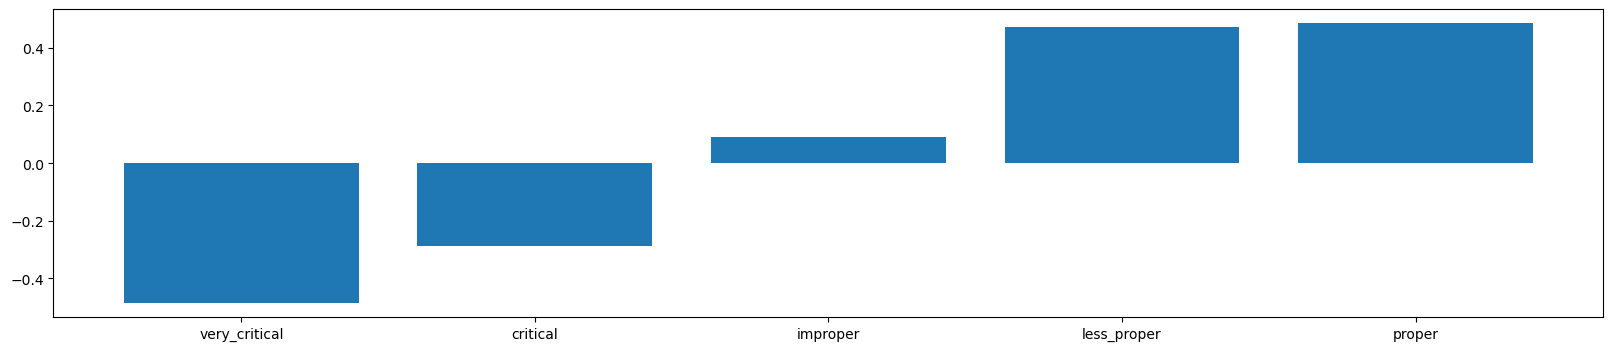

In [44]:
cat = 'has_nurs'
idx = feature_names.index(cat)
plot_bar(cf.d_abs[idx], np.array(categories_dict[idx]), figsize=(20,4))

## SHAP

In [45]:
import shap
shap.initjs()

In [46]:
# Get SHAP values
shap_explainer = shap.KernelExplainer(model.predict_proba, shap.kmeans(X_train, 10))
shap_values = shap_explainer(X_test)

  0%|          | 0/2526 [00:00<?, ?it/s]

In [47]:
# Set SHAP feature names
shap_explainer.feature_names = X_test.columns

# Get shape of SHAP vaules
shap_values.shape

(2526, 8, 3)

In [48]:
# Get same data frame as X_test from train_test_split
X_test_df = df.reindex(X_test.index).drop('class', axis=1)

In [49]:
# Replace data with categorical feature values 
new_data = np.array(X_test_df)
shap_values.data = np.array(new_data)

# Update feature names
shap_values.feature_names = list(cat_cols)

type(shap_values)

shap._explanation.Explanation

In [50]:
# Create a SHAP Explanation object
shap_values_exp = shap.Explanation(
    values=shap_values[0, :, 0],
    feature_names=shap_values.feature_names)

# Now plot the force plot
shap.plots.force(shap_values_exp)

In [51]:
# Create a SHAP Explanation object
shap_values_exp = shap.Explanation(
    values=shap_values[0, :, 1],
    feature_names=shap_values.feature_names)

# Now plot the force plot
shap.plots.force(shap_values_exp)

In [52]:
# Create a SHAP Explanation object
shap_values_exp = shap.Explanation(
    values=shap_values[0, :, 2],
    feature_names=shap_values.feature_names)

# Now plot the force plot
shap.plots.force(shap_values_exp)

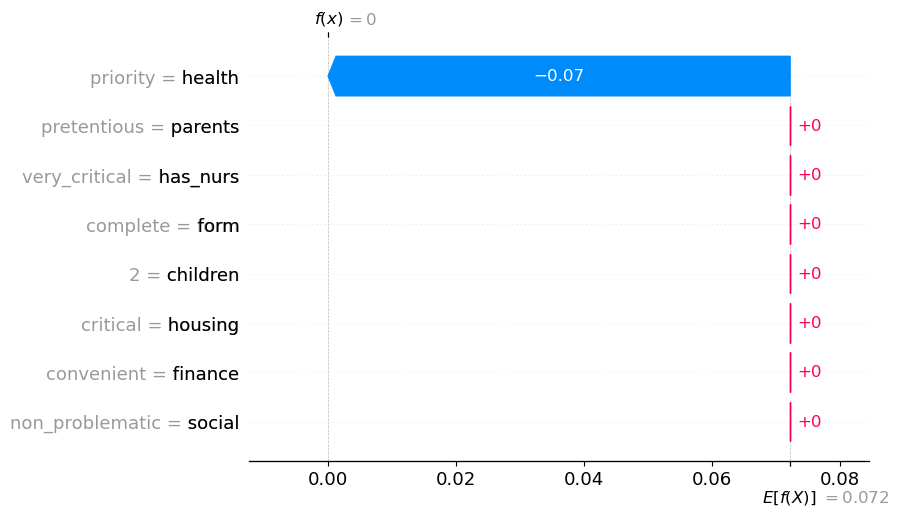

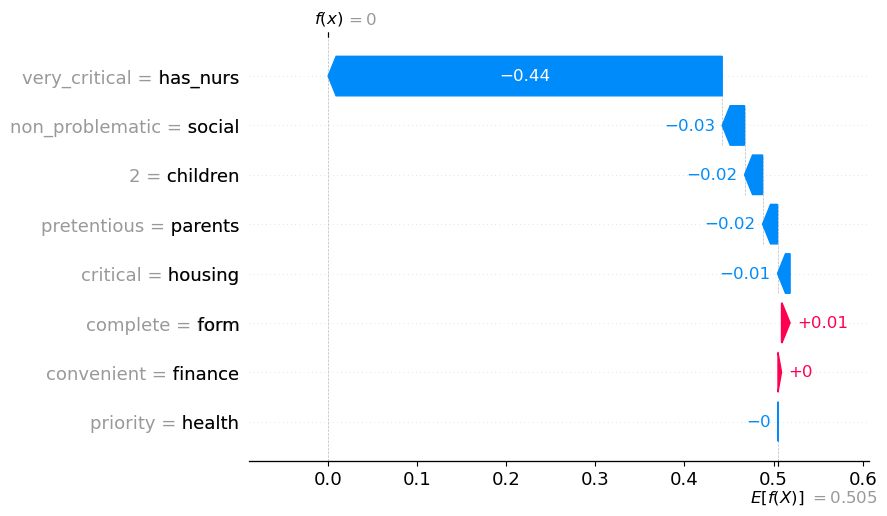

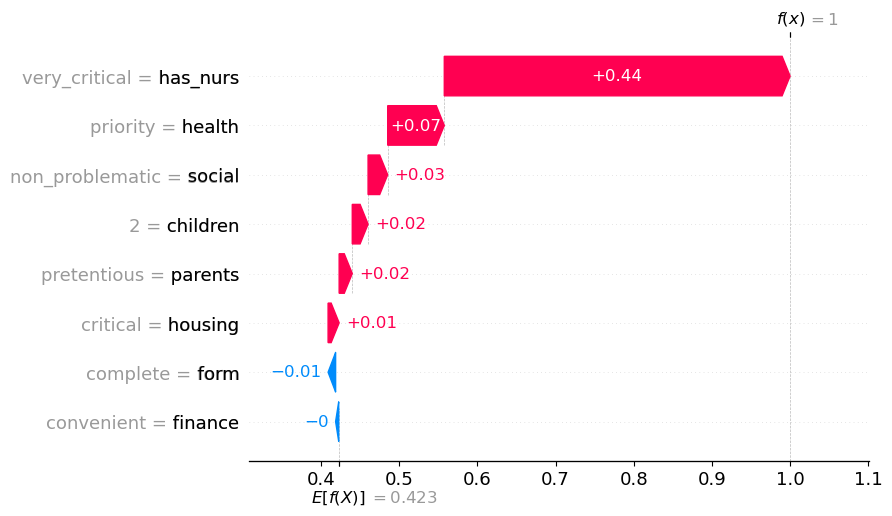

In [53]:
shap.plots.waterfall(shap_values[0, :, 0])
shap.plots.waterfall(shap_values[0, :, 1])
shap.plots.waterfall(shap_values[0, :, 2])

In [54]:
model.predict_proba(X_test)[0]

array([1.88822717e-125, 2.47228250e-013, 1.00000000e+000])

In [55]:
# Plotting force plot for every probability class of first prediction with specific BASE value
shap.plots.force(shap_explainer.expected_value[0], shap_values.values[0, :, 0], feature_names=shap_values.feature_names,out_names="Application classification")

In [56]:
shap.plots.force(shap_explainer.expected_value[1], shap_values.values[0, :, 1], out_names="Application classification")

In [57]:
shap.plots.force(shap_explainer.expected_value[2], shap_values.values[0, :, 2], out_names="Application classification")

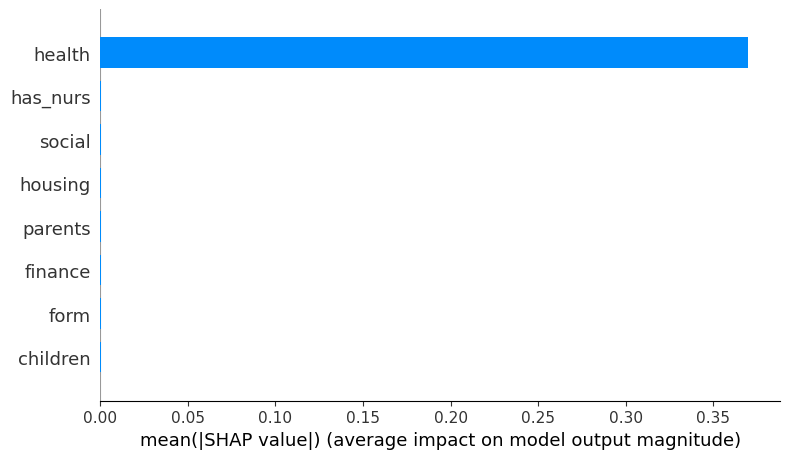

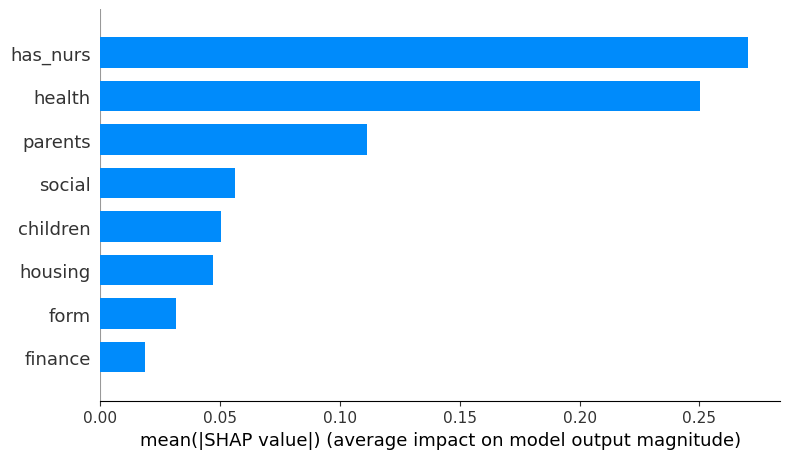

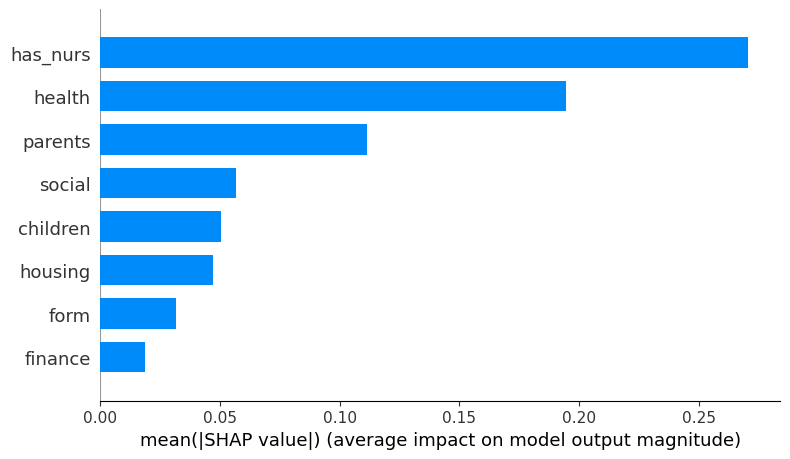

In [58]:
# Create a SHAP summary plot
shap.summary_plot(shap_values[:, :, 0], X_test.values, plot_type="bar", feature_names=X_test.columns, class_names=model.classes_)
shap.summary_plot(shap_values[:, :, 1], X_test.values, plot_type="bar", feature_names=X_test.columns, class_names=model.classes_)
shap.summary_plot(shap_values[:, :, 2], X_test.values, plot_type="bar", feature_names=X_test.columns, class_names=model.classes_)

In [59]:
shap_values.shape

(2526, 8, 3)

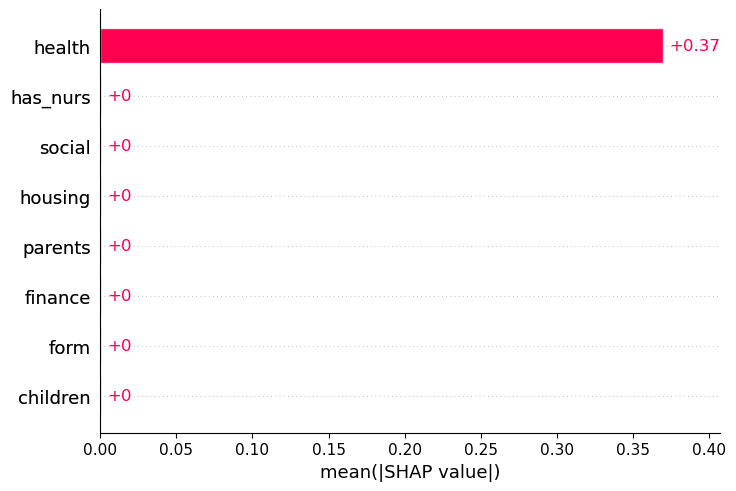

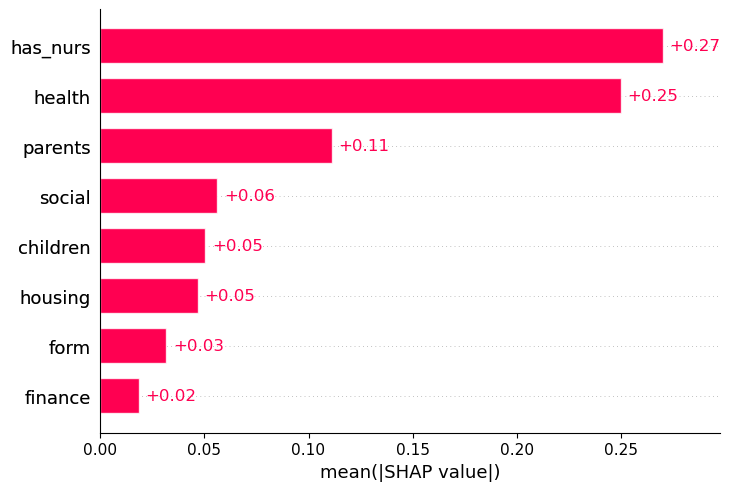

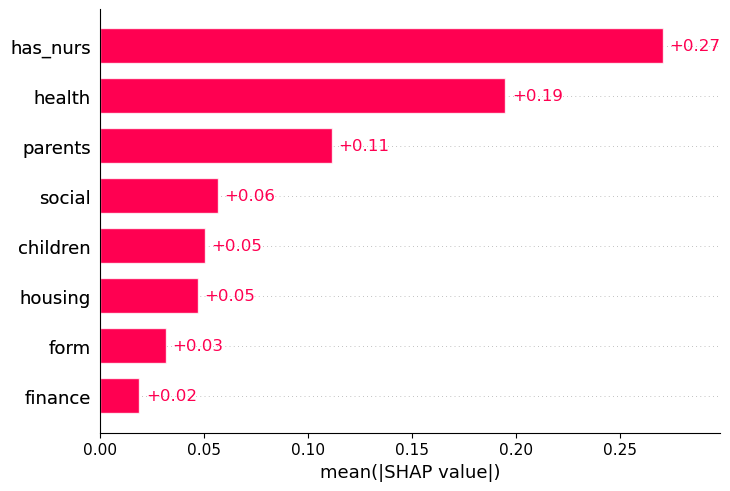

In [60]:
# Mean SHAP (instance, features = :, class)
shap.plots.bar(shap_values[:, :, 0])
shap.plots.bar(shap_values[:, :, 1])
shap.plots.bar(shap_values[:, :, 2])